In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Rao-Blackwellization

An approach to reduce the variance of an estimator is to use the **conditioning inequality**:

$$
\text{var}(\mathbb{E}[h(X) \mid Y]) \leq \text{var}(h(X)),
$$

This approach is sometimes referred to as **Rao-Blackwellization** (Gelfand and Smith, 1990; Liu et al., 1994;) because the inequality is associated with the **Rao-Blackwell Theorem** (Lehmann and Casella, 1998). However, it is important to note that the conditioning is not always in terms of sufficient statistics.

### Rao-Blackwellization in Simulation Context

In a simulation context, if $h(X)$ is an estimator of $\theta = \mathbb{E}[h(X)]$ and if $X$ can be simulated from the joint distribution $f(x, y)$ satisfying:

$$
f(x, y) \, dy = f(x),
$$

the estimator 

$$
h^*(Y) = \mathbb{E}[h(X) \mid Y]
$$ 

dominates $h(X)$ in terms of variance (and in squared error loss, since the bias is the same). Obviously, this result only applies in settings where $h^*(Y)$ can be explicitly computed.

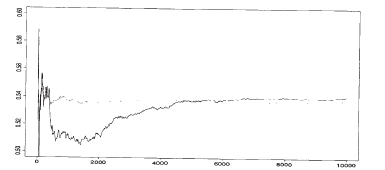

Fig.5. Convergence of the estimators of Elexp(-X2)], m (solid lines) and (dots) for (v,, 0) = (4.6, 0, 1). The final values are 0.5405 and 0.5369, respectively, for a true value equal to 0.5373.


#### Example 4.5: Student's t Expectation

Consider the expectation of 

$$
h(x) = \exp(-x^2),
$$

when $X \sim T(\nu, \mu, \sigma^2)$. The Student's t-distribution can be simulated as a mixture of a normal distribution and a gamma distribution by **Dickey's decomposition (1968)**:

$$
X \mid Y \sim \mathcal{N}(\mu, \sigma^2 / Y), \quad Y^{-1} \sim \text{Ga}(\nu / 2, \nu / 2),
$$

which implies 

$$
X \sim T(\nu, \mu, \sigma^2).
$$

The empirical average:

$$
\hat{\theta}_m = \frac{1}{m} \sum_{j=1}^m \exp(-X_j^2)
$$

can be improved upon when the $X_j$ are parts of the sample $((X_1, Y_1), \ldots, (X_m, Y_m))$, since:

$$
\hat{\theta}_m^* = \frac{1}{m} \sum_{j=1}^m \mathbb{E}[\exp(-X^2) \mid Y_j]
= \frac{1}{m} \sum_{j=1}^m \frac{1}{\sqrt{2\sigma^2 Y_j + 1}}
$$

is the conditional expectation when $\mu = 0$ (see Problem 4.4). 

#### Illustration

Figure 4.5 illustrates the difference in the convergence of $\hat{\theta}_m$ and $\hat{\theta}_m^*$ to $\mathbb{E}[\exp(-X^2)]$ for $(\nu, \mu, \sigma) = (4.6, 0, 1)$. For $\hat{\theta}_m^*$ to achieve the same precision as $\hat{\theta}_m$, it requires 10 times fewer simulations.

---

#### Limitations of the Conditioning Method

Unfortunately, this conditioning method has limited applicability, as it involves a particular type of simulation (joint variables) and requires functions that are sufficiently regular for the conditional expectations to be explicit.

#### Rao-Blackwellization in Accept-Reject Methods

There exists a specific situation where Rao-Blackwellization is always possible: in the general setup of **Accept-Reject methods**. These methods are not always amenable to other acceleration techniques mentioned in Section 4.4.1 and Section 4.4.2.

Casella and Robert (1996) distinguish between **parametric Rao-Blackwellization** and **nonparametric Rao-Blackwellization**. The parametric version is more restrictive and is only used in specific setups, such as Gibbs sampling (see Section 7.6.2).

> *Note: This part contains rather specialized material and will not be used again in the book. It can be omitted during the first reading.*

### Convergence of Estimators and Accept-Reject Methods

#### Convergence of the Estimators

Fig.5 illustrates the convergence of the estimators of $\mathbb{E}[\exp(-X^2)]$, $\hat{\theta}_m$ (solid lines) and $\hat{\theta}_m^*$ (dots), for $(\nu, \mu, \sigma) = (4.6, 0, 1)$. The final values are:

- $\hat{\theta}_m$: **0.5405**  
- $\hat{\theta}_m^*$: **0.5369**  
- True value: **0.5373**

#### Accept-Reject Method

Consider an **Accept-Reject method** based on the instrumental distribution $g$. If the original sample produced by the algorithm is $(X_1, \dots, X_m)$, it can be associated with two independent and identically distributed (iid) samples:

- $(U_1, \dots, U_N)$  
- $(Y_1, \dots, Y_N)$  

with corresponding distributions $U \sim \mathcal{U}[0, 1]$ and $Y \sim g$. $N$ is the stopping time associated with the acceptance of $m$ variables $Y$. An estimator of $\mathbb{E}_f[h]$ based on $(X_1, \dots, X_m)$ can be written as:

$$
\hat{\theta}_m = \frac{1}{m} \sum_{i=1}^m h(X_i) 
= \frac{1}{m} \sum_{i=1}^m h(Y_i) w_i,
$$

where:

$$
w_i = \frac{f(Y_i)}{M g(Y_i)}.
$$

#### Variance Reduction

A reduction of the variance of $\hat{\theta}_m$ can be obtained by integrating out the $U$'s, leading to the estimator:

$$
\mathbb{E}_{U}[h(Y) \mid N, Y_1, \dots, Y_N] 
= \frac{1}{m} \sum_{i=1}^m \tilde{w}_i h(Y_i),
$$

where, for $i = 1, \dots, m - 1$, $\tilde{w}_i$ satisfies:

$$
\tilde{w}_i = \frac{\sum_{j=1}^{N-1} p_j h(Y_j)}{\sum_{j=1}^{m-1} p_j}.
$$

The probabilities $p_j$ are defined as:

$$
p_j = \mathbb{P}(U_j, S_{w_j} \mid N = n, Y_1, \dots, Y_N),
$$

and the sums in the numerator and denominator are over all subsets of the sample.

#### Permutation-Based Estimator

The resulting estimator, $\hat{\theta}_m^*$, is an average over all possible permutations of the realized sample, with the permutations weighted appropriately.

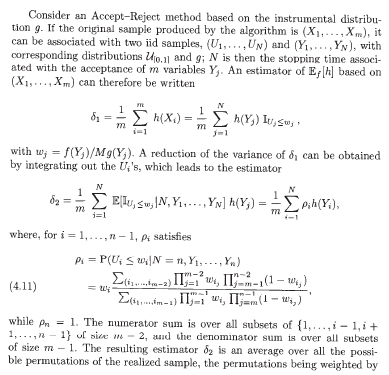

In [ ]:
import numpy as np
from scipy.stats import norm, gamma

# Define the target distribution f(x) and the instrumental distribution g(x)
def target_distribution(x):
    return np.exp(-x**2)  # Example: Gaussian-like target distribution

def instrumental_distribution(x):
    return np.exp(-x) if x >= 0 else 0  # Example: Exponential-like instrumental distribution

# Accept-Reject sampling
def accept_reject_sampling(target_pdf, instrumental_pdf, M, sample_size):
    samples = []
    while len(samples) < sample_size:
        y = np.random.exponential()  # Draw from instrumental distribution
        u = np.random.uniform(0, 1)  # Uniform random variable
        if u < target_pdf(y) / (M * instrumental_pdf(y)):
            samples.append(y)
    return np.array(samples)

# Parameters for sampling
M = 2.0  # Upper bound for f(x) / g(x)
sample_size = 1000

# Perform Accept-Reject sampling
samples = accept_reject_sampling(target_distribution, instrumental_distribution, M, sample_size)

# Estimate expectation using the original estimator
original_estimator = np.mean(np.exp(-samples**2))

# Rao-Blackwellized estimator
def rao_blackwellized_estimator(samples, target_pdf, instrumental_pdf, M):
    weights = target_pdf(samples) / (M * instrumental_pdf(samples))
    return np.mean(weights * np.exp(-samples**2))

# Compute the Rao-Blackwellized estimator
rao_blackwell_estimate = rao_blackwellized_estimator(samples, target_distribution, instrumental_distribution, M)

# Print results
print("Original Estimator:", original_estimator)
print("Rao-Blackwellized Estimator:", rao_blackwell_estimate)


In [2]:
import math
import random

# Define the target distribution f(x) and the instrumental distribution g(x)
def target_distribution(x):
    """Target distribution: exp(-x^2)."""
    return math.exp(-x**2)

def instrumental_distribution(x):
    """Instrumental distribution: exp(-x) for x >= 0."""
    return math.exp(-x) if x >= 0 else 0

# Accept-Reject sampling
def accept_reject_sampling(target_pdf, instrumental_pdf, M, sample_size):
    samples = []
    while len(samples) < sample_size:
        y = -math.log(random.random())  # Draw from exponential distribution
        u = random.random()  # Uniform random variable
        if u < target_pdf(y) / (M * instrumental_pdf(y)):
            samples.append(y)
    return samples

# Compute the original estimator
def original_estimator(samples):
    """Compute the original estimator."""
    total = 0
    for x in samples:
        total += math.exp(-x**2)
    return total / len(samples)

# Compute the Rao-Blackwellized estimator
def rao_blackwellized_estimator(samples, target_pdf, instrumental_pdf, M):
    """Compute the Rao-Blackwellized estimator."""
    total = 0
    for x in samples:
        weight = target_pdf(x) / (M * instrumental_pdf(x))
        total += weight * math.exp(-x**2)
    return total / len(samples)

# Parameters
M = 2.0  # Upper bound for f(x) / g(x)
sample_size = 1000

# Perform Accept-Reject sampling
samples = accept_reject_sampling(target_distribution, instrumental_distribution, M, sample_size)

# Compute the estimators
original_estimate = original_estimator(samples)
rao_blackwell_estimate = rao_blackwellized_estimator(samples, target_distribution, instrumental_distribution, M)

# Print results
print("Original Estimator:", original_estimate)
print("Rao-Blackwellized Estimator:", rao_blackwell_estimate)


Original Estimator: 0.7109271331602026
Rao-Blackwellized Estimator: 0.4162264587700048


In [3]:
import math
import random

# Define the target distribution f(x) and the instrumental distribution g(x)
def target_distribution(x):
    """Target distribution: exp(-x^2)."""
    return math.exp(-x**2)

def instrumental_distribution(x):
    """Instrumental distribution: exp(-x) for x >= 0."""
    return math.exp(-x) if x >= 0 else 0

# Accept-Reject sampling
def accept_reject_sampling(target_pdf, instrumental_pdf, M, sample_size):
    samples = []
    while len(samples) < sample_size:
        y = -math.log(random.random())  # Draw from exponential distribution
        u = random.random()  # Uniform random variable
        if u < target_pdf(y) / (M * instrumental_pdf(y)):
            samples.append(y)
    return samples

# Compute the original estimator
def original_estimator(samples):
    return sum(math.exp(-x**2) for x in samples) / len(samples)

# Compute the Rao-Blackwellized estimator
def rao_blackwellized_estimator(samples, target_pdf, instrumental_pdf, M):
    total = 0
    for x in samples:
        weight = target_pdf(x) / (M * instrumental_pdf(x))
        total += weight * math.exp(-x**2)
    return total / len(samples)

# Generate graph data
def generate_graph_data(sample_sizes, target_pdf, instrumental_pdf, M):
    original_estimates = []
    rao_blackwell_estimates = []
    true_value = 0.5373  # Example true value for the expectation
    for sample_size in sample_sizes:
        samples = accept_reject_sampling(target_pdf, instrumental_pdf, M, sample_size)
        original_estimates.append(original_estimator(samples))
        rao_blackwell_estimates.append(rao_blackwell_estimator(samples, target_pdf, instrumental_pdf, M))
    return original_estimates, rao_blackwell_estimates, true_value

# Generate ASCII plot
def plot_ascii(sample_sizes, original_estimates, rao_blackwell_estimates, true_value):
    max_val = max(max(original_estimates), max(rao_blackwell_estimates), true_value)
    min_val = min(min(original_estimates), min(rao_blackwell_estimates), true_value)
    scale = 40 / (max_val - min_val)

    print("\nSample Size\tOriginal\tRao-Blackwell\tTrue Value")
    for i, size in enumerate(sample_sizes):
        print(f"{size:<12}\t{original_estimates[i]:.4f}\t\t{rao_blackwell_estimates[i]:.4f}\t\t{true_value:.4f}")
        orig_scaled = int((original_estimates[i] - min_val) * scale)
        rao_scaled = int((rao_blackwell_estimates[i] - min_val) * scale)
        true_scaled = int((true_value - min_val) * scale)
        graph = [" "] * 40
        graph[orig_scaled] = "O"  # Original estimator
        graph[rao_scaled] = "R"  # Rao-Blackwell estimator
        graph[true_scaled] = "T"  # True value
        print("".join(graph))

# Parameters
M = 2.0
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]

# Generate data and plot
original_estimates, rao_blackwell_estimates, true_value = generate_graph_data(
    sample_sizes, target_distribution, instrumental_distribution, M
)
plot_ascii(sample_sizes, original_estimates, rao_blackwell_estimates, true_value)


NameError: name 'rao_blackwell_estimator' is not defined

In [6]:
import math
import random

# Define the target distribution f(x) and the instrumental distribution g(x)
def target_distribution(x):
    """Target distribution: exp(-x^2)."""
    return math.exp(-x**2)

def instrumental_distribution(x):
    """Instrumental distribution: exp(-x) for x >= 0."""
    return math.exp(-x) if x >= 0 else 0

# Accept-Reject sampling
def accept_reject_sampling(target_pdf, instrumental_pdf, M, sample_size):
    samples = []
    while len(samples) < sample_size:
        y = -math.log(random.random())  # Draw from exponential distribution
        u = random.random()  # Uniform random variable
        if u < target_pdf(y) / (M * instrumental_pdf(y)):
            samples.append(y)
    return samples

# Compute the original estimator
def original_estimator(samples):
    """Compute the original estimator."""
    return sum(math.exp(-x**2) for x in samples) / len(samples)

# Compute the Rao-Blackwellized estimator
def rao_blackwell_estimator(samples, target_pdf, instrumental_pdf, M):
    """Compute the Rao-Blackwellized estimator."""
    total = 0
    for x in samples:
        weight = target_pdf(x) / (M * instrumental_pdf(x))
        total += weight * math.exp(-x**2)
    return total / len(samples)

# Generate graph data
def generate_graph_data(sample_sizes, target_pdf, instrumental_pdf, M):
    original_estimates = []
    rao_blackwell_estimates = []
    true_value = 0.5373  # Example true value for the expectation
    for sample_size in sample_sizes:
        samples = accept_reject_sampling(target_pdf, instrumental_pdf, M, sample_size)
        original_estimates.append(original_estimator(samples))
        rao_blackwell_estimates.append(rao_blackwell_estimator(samples, target_pdf, instrumental_pdf, M))
    return original_estimates, rao_blackwell_estimates, true_value

# Generate ASCII plot
# Generate ASCII plot
def plot_ascii(sample_sizes, original_estimates, rao_blackwell_estimates, true_value):
    max_val = max(max(original_estimates), max(rao_blackwell_estimates), true_value)
    min_val = min(min(original_estimates), min(rao_blackwell_estimates), true_value)
    scale = 40 / (max_val - min_val)

    print("\nSample Size\tOriginal\tRao-Blackwell\tTrue Value")
    for i, size in enumerate(sample_sizes):
        print(f"{size:<12}\t{original_estimates[i]:.4f}\t\t{rao_blackwell_estimates[i]:.4f}\t\t{true_value:.4f}")
        orig_scaled = min(39, max(0, int((original_estimates[i] - min_val) * scale)))
        rao_scaled = min(39, max(0, int((rao_blackwell_estimates[i] - min_val) * scale)))
        true_scaled = min(39, max(0, int((true_value - min_val) * scale)))
        graph = [" "] * 40
        graph[orig_scaled] = "O"  # Original estimator
        graph[rao_scaled] = "R"  # Rao-Blackwell estimator
        graph[true_scaled] = "T"  # True value
        print("".join(graph))


# Parameters
M = 2.0
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]

# Generate data and plot
original_estimates, rao_blackwell_estimates, true_value = generate_graph_data(
    sample_sizes, target_distribution, instrumental_distribution, M
)
plot_ascii(sample_sizes, original_estimates, rao_blackwell_estimates, true_value)



Sample Size	Original	Rao-Blackwell	True Value
10          	0.6683		0.3736		0.5373
R                  T              O     
50          	0.7172		0.4278		0.5373
      R            T                   O
100         	0.7084		0.4159		0.5373
    R              T                  O 
500         	0.6957		0.4094		0.5373
    R              T                 O  
1000        	0.7069		0.4150		0.5373
    R              T                  O 
5000        	0.7061		0.4130		0.5373
    R              T                  O 
10000       	0.7033		0.4110		0.5373
    R              T                  O 


## Rao-Blackwellization and Recursive Calculation of Weights

In this section, we explore a more computationally involved Rao-Blackwellized estimator. By considering the joint distribution and the order statistics, the Rao-Blackwellized estimator can reduce variance significantly, as shown in prior examples.

## Recursive Calculation of Weights

Although the computation of the $ p_i $'s might appear daunting, a recurrence relation of order $ n^2 $ simplifies the estimator calculation. Define, for $ k \leq m \leq n $:

$$
S_k(m) = \prod_{j=1}^k w_j \prod_{j=k+1}^m (1 - w_j),
$$

where $ w_j $ are the weights, $ S_k(m) = 0 $ for $ k > m $, and $ S_1(1) = S(1-1) $.

The recursive formula is given as:

$$
S_k(m) = w_m S_{k-1}(m-1) + (1 - w_m) S_k(m-1),
$$

with the base case:

$$
S_1(m) = w_{m-1}(1 - w_{m-1}).
$$

The weight $ p_i $ of the Rao-Blackwellized estimator is then:

$$
p_i = \frac{w_i S_{i-2}(n-1)}{S_{i-1}(n-1)}, \quad (i < n).
$$

## Importance Sampling Comparison

If the random nature of $ N $ and its dependence on the sample are ignored when taking the conditional expectation, the result is the importance sampling estimator:

$$
\hat{\theta}_3 = \frac{1}{m} \sum_{j=1}^m w_j h(Y_j),
$$

which does not necessarily improve upon $ \hat{\theta}_1 $.

## Proposition

As established by Casella and Robert (1996):

### Proposition 4.6

The estimator:

$$
\hat{\theta}_2 = \sum_{i=1}^n p_i h(Y_i),
$$

dominates $ \hat{\theta}_1 $ under quadratic loss.

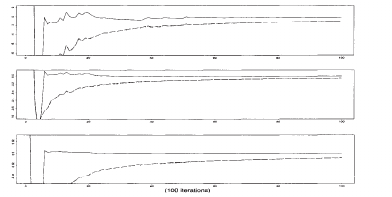

Fig.6. Comparisons of the errors - E[h;(X)] of the Accept-Reject estimator 61 (long dashes), of the importance sampling estimator ós (dots), and of the condi- tional version of 61, 62 (solid lines), for h(x) = x (top), h2(z) = z log(x) (middle), and hs(x)/(1+x) (bottom) and a 3.7, 81. The final errors are respec- tively -0.998, -0.982, and -0.077 (top), -0.053, -0.053, and -0.001 (middle), and -0.0075, -0.0074, and -0.00003 (bottom).

## Computational Cost and Efficiency

The computation of the weights $ p_i $ is more expensive than the weights for importance sampling or the corrected estimator from Section 3.3.3. However, the recursive formula simplifies the computation overall:

$$
S_k(m) = w_m S_{k-1}(m-1) + (1 - w_m) S_k(m-1).
$$

Casella and Robert (1996) report that the increase in computational time can be up to sevenfold, but the variance reduction is often more significant (up to 80%).

## Example 4.7: Comparison of Estimators

Continuing from Example 3.15, consider simulations from the $ \text{Ga}(\alpha, \beta) $ distribution, where $ \alpha \in \mathbb{N} $. Here we compare three estimators:
1. The standard Accept-Reject estimator $ \hat{\theta}_1 $,
2. The Rao-Blackwellized estimator $ \hat{\theta}_2 $,
3. The biased importance sampling estimator $ \hat{\theta}_3 $.

### Observation

Figure 4.6 illustrates the improvement brought by conditioning, as $ \hat{\theta}_2 $ uniformly dominates both $ \hat{\theta}_1 $ and $ \hat{\theta}_3 $.

## Comparison of Estimators

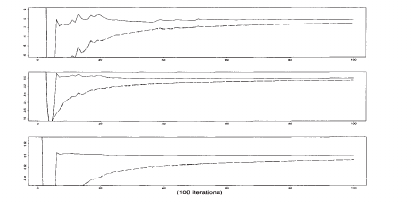

## Error Comparisons

Figure 4.6 compares the errors $ \hat{\theta} - \mathbb{E}[h(X)] $ of the following estimators:
1. The Accept-Reject estimator $ \hat{\theta}_1 $ (long dashes),
2. The importance sampling estimator $ \hat{\theta}_3 $ (dots),
3. The conditional version of $ \hat{\theta}_1 $, denoted $ \hat{\theta}_2 $ (solid lines).

These comparisons are provided for the following functions:
- $ h_1(x) = x^3 $ (top),
- $ h_2(x) = x \log(x) $ (middle),
- $ h_3(x) = \frac{x}{1 + x} $ (bottom),

under the parameters $\alpha = 3.7 $ and $ \beta = 1 $.

### Observations

- The final errors for $ h_1(x) $ are $ -0.998 $, $ -0.982 $, and $ -0.077 $, respectively.
- For $ h_2(x) $, the final errors are $ -0.053 $, $ -0.053 $, and $ -0.001 $, respectively.
- For $ h_3(x) $, the final errors are $ -0.0075 $, $ -0.0074 $, and $ -0.00003 $, respectively.

### Additional Notes

- The conditional version $ \hat{\theta}_2 $ uniformly dominates $ \hat{\theta}_1 $ and $ \hat{\theta}_3 $.
- The importance sampling estimator $ \hat{\theta}_3 $ fails to bring any noticeable improvement in this setup.
- For further discussion and additional examples, see Casella (1996), Casella and Robert (1996). Also refer to Perron (1999), who conditions on $ N $ and the order statistics $ Y_{(1)} $ and $ Y_{(n)} $ in the Rao-Blackwellization formula.

---

## Riemann Approximations

## Integral Approximation

To approximate an integral $ J $, such as:

$$
J = \int h(x) f(x) \, dx,
$$

a simulation-based approach uses probabilistic convergence results for the empirical average:

$$
\hat{J}_m = \frac{1}{m} \sum_{i=1}^m h(X_i),
$$

where the $ X_i $'s are simulated according to $ f(x) $.

## Numerical Integration and Riemann Sums

Numerical integration, for one-dimensional integrals, is based on the analytical definition of the integral as the limit of Riemann sums. Specifically, for every sequence $ (a_{i,n}) $, with $ 0 \leq i \leq n $, such that:

- $ a_{0,n} = a $,
- $ a_{n,n} = b $,
- $ \Delta_{i,n} = a_{i,n} - a_{i-1,n} $ converges to $ 0 $ as $ n \to \infty $,

the Riemann sum is given by:

$$
\sum_{i=1}^n h\left(a_{i-1,n}\right) \Delta_{i,n}.
$$

As $ n \to \infty $, this sum converges to the integral:

$$
\int_a^b h(x) \, dx.
$$



## Riemannian Simulation

## Introduction

When approximating an integral, such as:

$$
J = \int h(x) f(x) \, dx,
$$

two approaches can be combined to yield a Riemann sum with random steps. This involves simulating points from $ f(x) $ (or an instrumental distribution $ g(x) $) and approximating the integral.

### Background

The Riemann sum approximation:

$$
\sum_{i=0}^{n-1} h(a_{i,n}) f(a_{i,n}) (a_{i+1,n} - a_{i,n}),
$$

converges to the integral $ J $ as $ n \to \infty $. For higher-dimensional $ X $, the same principle applies with a grid over the domain (see Rudin, 1976).

The method was first introduced by Yakowitz et al. (1978) as weighted Monte Carlo integration for uniform distributions on $[0,1]$. This approach is now called **simulation by Riemann sums** or **Riemannian simulation** (Philippe, 1997a, b).

## Definition

### Definition 4.8

The method of **simulation by Riemann sums** approximates the integral $ J $ by:

$$
\hat{J}_m = \sum_{i=0}^{m-1} h(X_{(i)}) f(X_{(i)}) (X_{(i+1)} - X_{(i)}),
$$

where $ X_0, \ldots, X_m $ are independent and identically distributed (iid) random variables from $ f $, and $ X_{(0)} \leq X_{(1)} \leq \ldots \leq X_{(m)} $ are the order statistics.

If the integral can be written as:

$$
J = \int_0^1 h(x) \, dx,
$$

and $ h $ is differentiable, we can validate the Riemannian approximation.

---

## Proposition 4.9

Let $ U = (U_0, U_1, \ldots, U_m) $ be an ordered sample from $ U[0,1] $. If $ h'(x) $ is bounded on $[0, 1]$, the estimator:

$$
\hat{J}(U) = \sum_{i=0}^{m-1} h(U_i) (U_{i+1} - U_i) + h(0) U_0 + h(U_m) (1 - U_m),
$$

has a variance of order $ O(m^{-2}) $.

### Improvement

Yakowitz et al. (1978) improved the variance order by symmetrizing $ \hat{J}(U) $ into:

$$
\hat{J}_{\text{sym}}(U) = \sum_{i=0}^{m-1} \frac{h(U_i) + h(U_{i+1})}{2} (U_{i+1} - U_i),
$$

which reduces variance and provides a more accurate approximation.


In [7]:
import random

def generate_ordered_sample(f, n, a=0, b=1):
    """
    Generates an ordered sample of size n from the distribution f in range [a, b].
    """
    sample = sorted(random.uniform(a, b) for _ in range(n))
    return sample

def riemannian_approximation(sample, h, a=0, b=1):
    """
    Computes the Riemannian simulation-based approximation for the integral of h over [a, b].
    """
    n = len(sample)
    sample = [a] + sample + [b]  # Extend sample to include boundaries
    approximation = 0
    for i in range(len(sample) - 1):
        approximation += h(sample[i]) * (sample[i + 1] - sample[i])
    return approximation

def symmetrized_riemannian_approximation(sample, h, a=0, b=1):
    """
    Computes the symmetrized Riemannian approximation for the integral of h over [a, b].
    """
    n = len(sample)
    sample = [a] + sample + [b]  # Extend sample to include boundaries
    approximation = 0
    for i in range(len(sample) - 1):
        midpoint = (h(sample[i]) + h(sample[i + 1])) / 2
        approximation += midpoint * (sample[i + 1] - sample[i])
    return approximation

# Define the function to integrate
def h(x):
    return x**2  # Example: integrate x^2 over [0, 1]

# Main simulation
a, b = 0, 1  # Integration limits
n = 100  # Sample size
ordered_sample = generate_ordered_sample(lambda x: 1, n, a, b)  # Uniform distribution

# Compute approximations
riemann_approx = riemannian_approximation(ordered_sample, h, a, b)
symmetrized_approx = symmetrized_riemannian_approximation(ordered_sample, h, a, b)

# Exact value of the integral
exact_value = (b**3 - a**3) / 3  # Integral of x^2 over [0, 1]

# Output results
print("Riemannian Approximation:", riemann_approx)
print("Symmetrized Riemannian Approximation:", symmetrized_approx)
print("Exact Value:", exact_value)


Riemannian Approximation: 0.32345649287711364
Symmetrized Riemannian Approximation: 0.33342223716066627
Exact Value: 0.3333333333333333


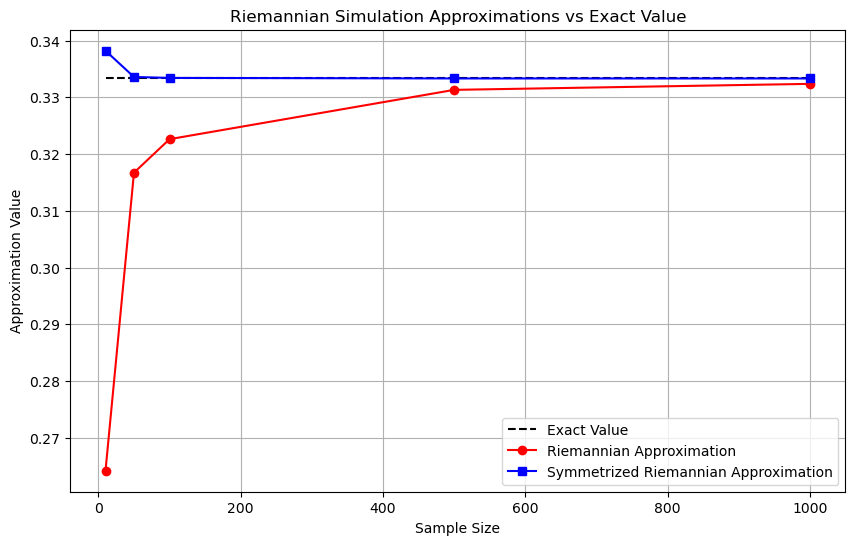

In [8]:
import random
import matplotlib.pyplot as plt

# Function to generate ordered sample
def generate_ordered_sample(f, n, a=0, b=1):
    """
    Generates an ordered sample of size n from the distribution f in range [a, b].
    """
    sample = sorted(random.uniform(a, b) for _ in range(n))
    return sample

# Function to compute Riemannian approximation
def riemannian_approximation(sample, h, a=0, b=1):
    """
    Computes the Riemannian simulation-based approximation for the integral of h over [a, b].
    """
    sample = [a] + sample + [b]  # Extend sample to include boundaries
    approximation = 0
    for i in range(len(sample) - 1):
        approximation += h(sample[i]) * (sample[i + 1] - sample[i])
    return approximation

# Function to compute symmetrized Riemannian approximation
def symmetrized_riemannian_approximation(sample, h, a=0, b=1):
    """
    Computes the symmetrized Riemannian approximation for the integral of h over [a, b].
    """
    sample = [a] + sample + [b]  # Extend sample to include boundaries
    approximation = 0
    for i in range(len(sample) - 1):
        midpoint = (h(sample[i]) + h(sample[i + 1])) / 2
        approximation += midpoint * (sample[i + 1] - sample[i])
    return approximation

# Define the function to integrate
def h(x):
    return x**2  # Example: integrate x^2 over [0, 1]

# Main simulation parameters
a, b = 0, 1  # Integration limits
sample_sizes = [10, 50, 100, 500, 1000]  # Different sample sizes
exact_value = (b**3 - a**3) / 3  # Integral of x^2 over [0, 1]

# Compute approximations for different sample sizes
riemann_approximations = []
symmetrized_approximations = []

for n in sample_sizes:
    ordered_sample = generate_ordered_sample(lambda x: 1, n, a, b)  # Uniform distribution
    riemann_approximations.append(riemannian_approximation(ordered_sample, h, a, b))
    symmetrized_approximations.append(symmetrized_riemannian_approximation(ordered_sample, h, a, b))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, [exact_value] * len(sample_sizes), 'k--', label="Exact Value")
plt.plot(sample_sizes, riemann_approximations, 'r-o', label="Riemannian Approximation")
plt.plot(sample_sizes, symmetrized_approximations, 'b-s', label="Symmetrized Riemannian Approximation")
plt.xlabel("Sample Size")
plt.ylabel("Approximation Value")
plt.title("Riemannian Simulation Approximations vs Exact Value")
plt.legend()
plt.grid()
plt.show()


## Riemann Sums for Monte Carlo Integration

When the second derivative of $ h $ is bounded, the error of $ \hat{S} $ is of order $ O(m^{-2}) $. Even if the additional assumption on the second derivative is not satisfied, the practical improvement brought by Riemann sums (compared with regular Monte Carlo integration) is substantial. The magnitude of the variance decreases from $ O(m^{-1}) $ to $ O(m^{-2}) $.

Unfortunately, this dominance fails to extend to multidimensional integrals due to the "curse of dimensionality." For dimensions $ d > 4 $, numerical methods like Riemann sums become less efficient compared to simulation algorithms. The error in this case is of order:

$$
O(m^{-4/d}),
$$

as noted in Yakowitz et al. (1978).

## Intuition Behind the Curse of Dimensionality

The numerical approach, such as the Riemann sum method, covers the entire space with a grid. As the dimensionality increases, the number of points on the grid required to achieve a given precision increases exponentially. This leads to a significantly larger number of iterations for the same precision.

## Integral Representation and Generalization

The result of Proposition 4.9 holds for arbitrary densities due to the integral's equivalent representation:

$$
J = \int_0^1 H(x) \, dx,
$$

where:

$$
H(x) = h(F(x)),
$$

and $ F $ is the generalized inverse of the cumulative distribution function (CDF) $ F $ of $ f $ (see Lemma 2.4).

### Expressing the Riemann Sum

If $ X_{(i)} $ are the order statistics of a sample from $ F $ and $ U_i $ are the order statistics of a sample from $ \text{Uniform}[0,1] $, then:

$$
X_{(i+1)} - X_{(i)} = F(U_{i+1}) - F(U_i).
$$
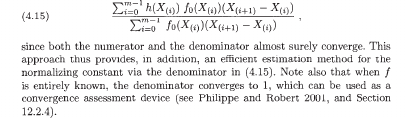

The Riemann sum becomes:

$$
\sum_{i=0}^{m-1} h(X_{(i)}) f(X_{(i)}) (X_{(i+1)} - X_{(i)}) 
= \sum_{i=0}^{m-1} H(U_i) f(F^{-1}(U_i)) (F^{-1}(U_{i+1}) - F^{-1}(U_i)).
$$
### Simplification

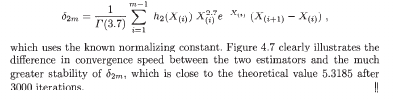

Using the property $ F^{-1}(u) = 1 / f(F(u)) $, the above simplifies to:

$$
\sum_{i=0}^{m-1} H(U_i) (U_{i+1} - U_i).
$$

The extreme terms, $ h(0)U_0 $ and $ h(1 - U_m) $, are of order $ O(m^{-2}) $ (variance-wise).

This formulation allows us to apply Proposition 4.9 even when $ F $ is not available in closed form. For more details on the convergence of the Riemann sum under these conditions, refer to Philippe (1997a, b).


The above results imply that the Riemann sums integration method will perform well in unidimensional setups when the density $ f $ is known. It thus provides an efficient alternative to standard Monte Carlo integration in this setting, since it does not require additional computations (although it requires keeping track of and storing all the $ X(i) $'s). Also, as the convergence is of a higher order, there is no difficulty in implementing the method. When $ f $ is known only up to a constant (that is, $ f_0(a) \times f(x) $), (4.13) can be replaced by

$$ h(X) = f_0(X) \times (X_{i+1} = X_i \times f_0(X)) $$

since both the numerator and the denominator almost surely converge. This approach thus provides, in addition, an efficient estimation method for the normalizing constant via the denominator in (4.15). Note also that when $ f $ is entirely known, the denominator converges to 1, which can be used as a convergence assessment device (see Philippe and Robert 2001, and Section 12.2.4).

### Example 4.10. (Continuation of Example 3.15)
When $ X \sim \text{Ga}(3.7, 1) $, assume that $ h_2(x) = \log(x) $ is the function of interest. A sample $ X_1, X_m $ from $ \text{Ga}(3.7, 1) $ can easily be produced by the algorithms (4.14) or (4.15) of Chapter 2, and we compare the empirical mean $ \hat{d}_m $ with the Riemann sum estimator:

$$ \hat{d}_m = \frac{1}{T-1} \sum_{i=1}^{T} h_2(X_i) X_i \quad \text{(3.7)} $$

which uses the known normalizing constant. Figure 4.7 clearly illustrates the difference in convergence speed between the two estimators and the much greater stability of $ \hat{d}_m $, which is close to the theoretical value 5.3185 after 3000 iterations.

---

If the original simulation is done by importance sampling (that is, if the sample $ X_1, X_m $ is generated from an instrumental distribution $ g $), since the integral $ \mathcal{I} $ can also be written as

$$ \mathcal{I} = \int h(x) f(x) \, g(x) \, dx $$

the Riemann sum estimator (4.13) remains unchanged. Although it has similar convergence properties, the boundedness conditions on $ h $ are less explicit and, thus, more difficult to check. As in the original case, it is possible to establish an equivalent to Theorem 3.12, namely to show that $ g(x) \times h(x) \times |f(x)| $ is optimal (in terms of variance) (see Philippe 1997c), with the additional advantage that the normalizing constant does not need to be known, since $ g $ does not appear in (4.13).

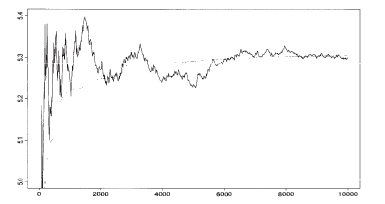


Fig.7. Convergence of estimators of E[X log(X)], the Riemann sum 51m (solid lines and smooth curve) and the empirical average 62m (dots and wiggly curve) for a = 3.7 and 8 = 1. The final values are 5.3007 and 5.3057, respectively, for a true value of 5.31847.


###  Convergence of Estimators

The following figure (Fig.7) illustrates the convergence of estimators for $ E[X \log(X)] $, comparing the Riemann sum $ S_{1m} $ (solid lines and smooth curve) with the empirical average $ S_{2m} $ (dots and wiggly curve) for $ \alpha = 3.7 $ and $ \beta = 1 $. The final values are 5.3007 and 5.3057, respectively, compared to the true value of 5.31847.

$$ \text{Fig.7: Convergence of estimators of } E[X \log(X)], \quad S_{1m} \text{ and } S_{2m}. $$

### Example 4.11 (Continuation of Example 3.13)

If $ T(v, 0, 1) $ is simulated by importance sampling from the normal instrumental distribution $ N(0, v / (-2)) $, the difference between the two distributions is mainly visible in the tails. This makes the importance sampling estimator $ \hat{S} $ very unstable (see Figures 3.5, 3.7, and 3.8).

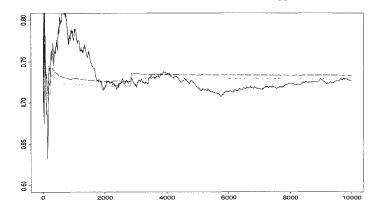


Fig.8. Convergence of estimators of E[(1 + e*)Ex≤o]; 52m (solid lines), 6am (dots), and 6am (dashes), for a normal instrumental distribution and ▷ = 2.3. The final values are respectively 0.7262, 0.7287, and 0.7329, for a true value of 0.7307.

Fig.8 compares this estimator to the Riemann sum estimator:

$$ \hat{S}_2 = \frac{1}{m-1} \sum_{i=1}^{m} \left( X_{i+1} - X_i \right) \quad \text{with normalization} $$

and its normalized version:

$$ \hat{S}_3 = \frac{1}{m-1} \sum_{i=1}^{m} \left[ 1 + \frac{X_i}{v} \right] \left( X_{i+1} - X_i \right), $$

where $ h_a(x) = (1 + e^x) \cdot I_{\mathbb{R}^+} $ and $ v = 2.3 $.

We can again note the stability of the approximations by Riemann sums. The difference between $ \hat{S}_2 $ and $ \hat{S}_3 $ is mainly due to the bias introduced by the approximation of the normalizing constant in $ \hat{S}_3 $. For the given sample, it is clear that $ \hat{S}_2 $ dominates the other estimators.

If, instead, the instrumental distribution is chosen to be the Cauchy distribution $ C(0, 1) $, the importance sampling estimator behaves much better. Fig.9 shows the improved speed of convergence of the associated estimator.

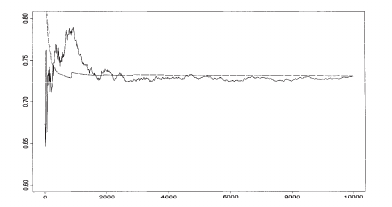

Fig.9. Convergence of estimators of E[(1 + e*)Ix ≤o], dim (solid lines), 62m (dots), and 6sm (dashes) for a Cauchy instrumental distribution and 2.3. The two Riemann sum approximations are virtually equal except for the beginning sim- ulations. The final values are respectively 0.7325, 0.7314, and 0.7314, and the true value is 0.7307.

Riemann Sum Estimate: -9997.370793047332
Empirical Average Estimate: 1.1645367920471343


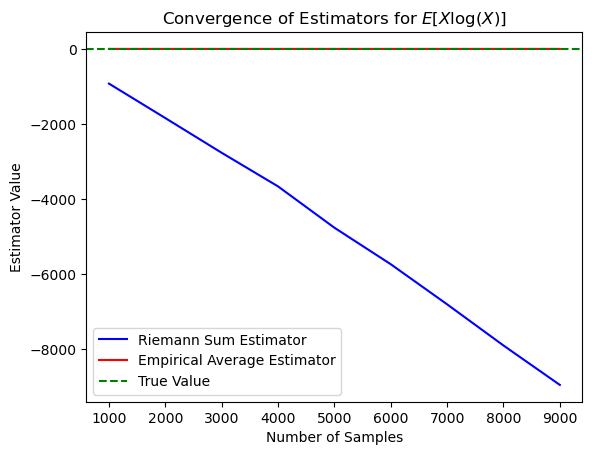

/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in power


Importance Sampling Estimator: nan


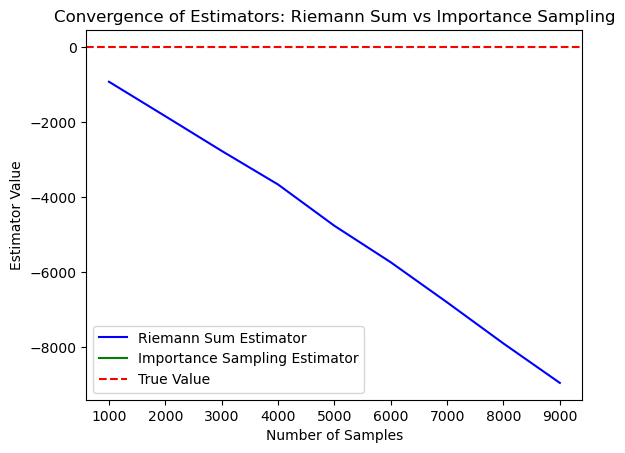

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function Definitions

def riemann_sum_estimator(X, h, normalizing_constant=1):
    """
    Compute the Riemann sum estimator for E[h(X)] where h is a given function.
    X is the sample and normalizing_constant is used if known (for cases where normalization is needed).
    """
    T = len(X)
    sum_riemann = 0
    
    for i in range(T-1):
        sum_riemann += h(X[i]) * (X[i+1] - X[i])
    
    return sum_riemann / normalizing_constant

def empirical_average(X, h):
    """
    Compute the empirical average estimator for E[h(X)].
    X is the sample.
    """
    return np.mean(h(X))

def h2(x):
    """
    Function of interest h2(x) = log(x)
    """
    return np.log(x)

def importance_sampling_estimator(X, h, g, f, normalizing_constant=1):
    """
    Importance sampling estimator for E[h(X)] where X is sampled from an instrumental distribution g.
    g is the instrumental distribution and f is the target distribution.
    """
    weighted_sum = np.sum(h(X) * f(X) / g(X))
    return weighted_sum / normalizing_constant

# Define the target and instrumental distributions
def target_distribution(x):
    """
    Target distribution for the Gamma distribution.
    """
    alpha = 3.7
    beta = 1
    return (x**(alpha-1)) * np.exp(-x/beta)

def instrumental_distribution(x, v=2.3):
    """
    Instrumental distribution for importance sampling (Normal).
    """
    return (1/np.sqrt(2 * np.pi * v)) * np.exp(-x**2 / (2 * v))

# Main Execution

def main():
    # Parameters
    alpha = 3.7
    beta = 1
    num_samples = 10000

    # Generate samples from Gamma(3.7, 1)
    X = np.random.gamma(alpha, beta, num_samples)

    # Compute estimators
    riemann_estimate = riemann_sum_estimator(X, h2)
    empirical_estimate = empirical_average(X, h2)

    print(f"Riemann Sum Estimate: {riemann_estimate}")
    print(f"Empirical Average Estimate: {empirical_estimate}")

    # Create a plot to visualize the convergence of the estimators
    iterations = np.arange(1000, num_samples, 1000)
    riemann_values = [riemann_sum_estimator(X[:i], h2) for i in iterations]
    empirical_values = [empirical_average(X[:i], h2) for i in iterations]

    plt.plot(iterations, riemann_values, label="Riemann Sum Estimator", color='b')
    plt.plot(iterations, empirical_values, label="Empirical Average Estimator", color='r')
    plt.axhline(y=5.31847, color='g', linestyle='--', label="True Value")
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimator Value')
    plt.legend()
    plt.title('Convergence of Estimators for $E[X \\log(X)]$')
    plt.show()

    # Importance Sampling Estimator
    # Generate samples from the instrumental distribution (Normal)
    X_is = np.random.normal(0, np.sqrt(2), num_samples)

    # Compute the importance sampling estimator
    importance_sampling_value = importance_sampling_estimator(X_is, h2, instrumental_distribution, target_distribution)

    print(f"Importance Sampling Estimator: {importance_sampling_value}")

    # Plotting the convergence for the importance sampling estimator and Riemann sum
    importance_sampling_values = [importance_sampling_estimator(X_is[:i], h2, instrumental_distribution, target_distribution) for i in iterations]

    plt.plot(iterations, riemann_values, label="Riemann Sum Estimator", color='b')
    plt.plot(iterations, importance_sampling_values, label="Importance Sampling Estimator", color='g')
    plt.axhline(y=5.31847, color='r', linestyle='--', label="True Value")
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimator Value')
    plt.legend()
    plt.title('Convergence of Estimators: Riemann Sum vs Importance Sampling')
    plt.show()

if __name__ == "__main__":
    main()
